In [ ]:
#SUPERVISED LEARNING
#Loan Default Prediction

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
loan_data=pd.read_csv('/content/drive/MyDrive/Loan_default.csv')

In [ ]:
loan_data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [ ]:
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


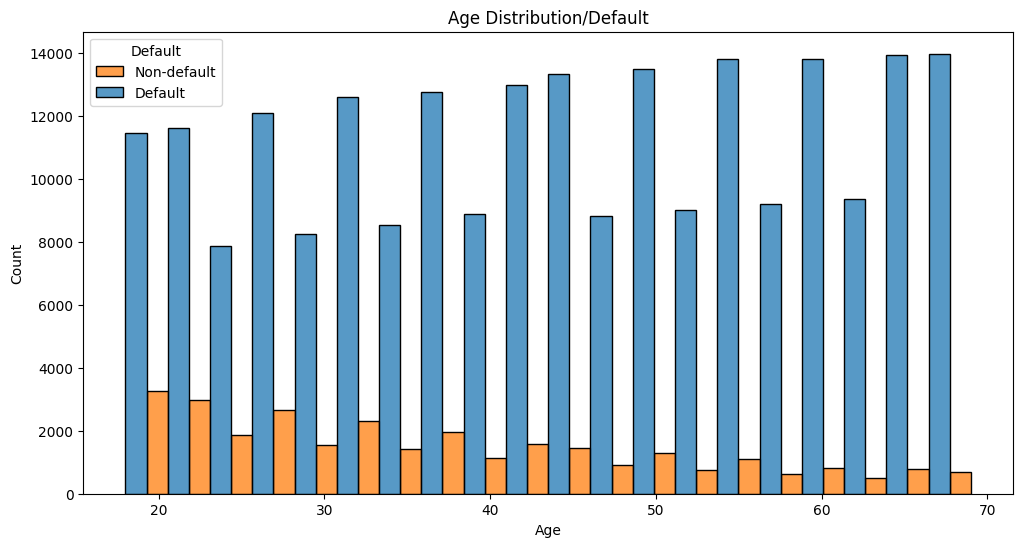

In [ ]:
#VIZUALIZATION
#Histogram

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data, x='Age', hue='Default', multiple="dodge", bins=20)
plt.title('Age Distribution/Default')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-default', 'Default'])
plt.show()

<ipython-input-32-5f989c535866>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x = 'Default', y = 'CreditScore',palette='coolwarm')


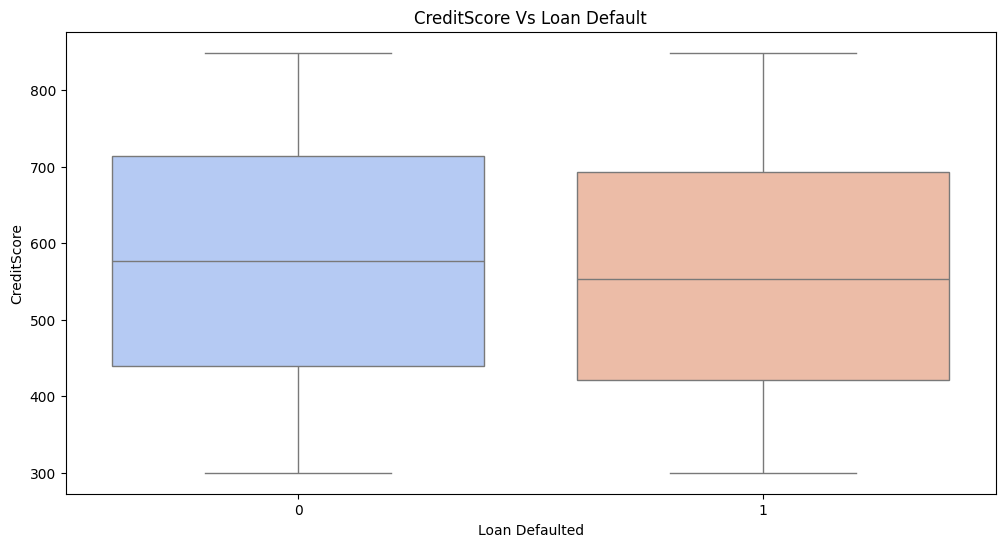

In [ ]:
#Boxplot

plt.figure(figsize=(12,6))
sns.boxplot(data=loan_data, x = 'Default', y = 'CreditScore',palette='coolwarm')
plt.xlabel('Loan Defaulted')
plt.ylabel('CreditScore')
plt.title('CreditScore Vs Loan Default')
plt.show()

In [ ]:
#PREPROCESSING
#Remove unwanted columns

loan_data=loan_data.drop(columns=['LoanID'])
loan_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0


In [ ]:
loan_data.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
#Encoding
#Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encodable = ['HasMortgage', 'HasDependents', 'HasCoSigner','Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
label_encoders = {col: LabelEncoder() for col in label_encodable}
for col in label_encodable:
    loan_data[col] = label_encoders[col].fit_transform(loan_data[col])
loan_data.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0
5,-1.234024,0.200157,-0.524147,0.917133,-1.199134,-0.448549,1.390390,-0.708685,-1.733149,1,3,2,1,0,1,1,1
6,-0.366793,0.736307,0.697992,-0.914167,0.590533,-1.343791,0.846423,-1.415845,-1.473314,0,3,2,1,0,3,1,0
7,0.833990,1.137047,0.394296,-0.272268,0.215280,1.341937,-0.805067,1.412793,-0.304059,3,0,1,0,0,3,1,0
8,-0.500213,-1.038071,-0.497199,1.590497,0.677130,-1.343791,1.574224,0.705634,-1.300091,0,2,0,1,0,2,0,1
9,-0.233372,1.290578,1.424765,-0.593217,1.571964,1.341937,-0.663425,0.705634,-0.737116,1,2,1,1,0,4,1,0


In [ ]:
#Standardization

from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
loan_data[numerical_cols] = StandardScaler().fit_transform(loan_data[numerical_cols])
loan_data.head(10)


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0
5,-1.234024,0.200157,-0.524147,0.917133,-1.199134,-0.448549,1.390390,-0.708685,-1.733149,1,3,2,1,0,1,1,1
6,-0.366793,0.736307,0.697992,-0.914167,0.590533,-1.343791,0.846423,-1.415845,-1.473314,0,3,2,1,0,3,1,0
7,0.833990,1.137047,0.394296,-0.272268,0.215280,1.341937,-0.805067,1.412793,-0.304059,3,0,1,0,0,3,1,0
8,-0.500213,-1.038071,-0.497199,1.590497,0.677130,-1.343791,1.574224,0.705634,-1.300091,0,2,0,1,0,2,0,1
9,-0.233372,1.290578,1.424765,-0.593217,1.571964,1.341937,-0.663425,0.705634,-0.737116,1,2,1,1,0,4,1,0


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = loan_data.drop('Default', axis=1)
y = loan_data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#Model Evaluation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Display a classification report for more metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 88.59%
Confusion Matrix:
[[45058   112]
 [ 5716   184]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



In [ ]:
#Random Forrest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = loan_data.drop('Default', axis=1)
y = loan_data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#Model Evaluation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Display a classification report for more metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 88.74%
Confusion Matrix:
[[45026   144]
 [ 5607   293]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.67      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [ ]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = loan_data.drop('Default', axis=1)
y = loan_data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#Model Evaluation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Display a classification report for more metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 88.73%
Confusion Matrix:
[[45011   159]
 [ 5596   304]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



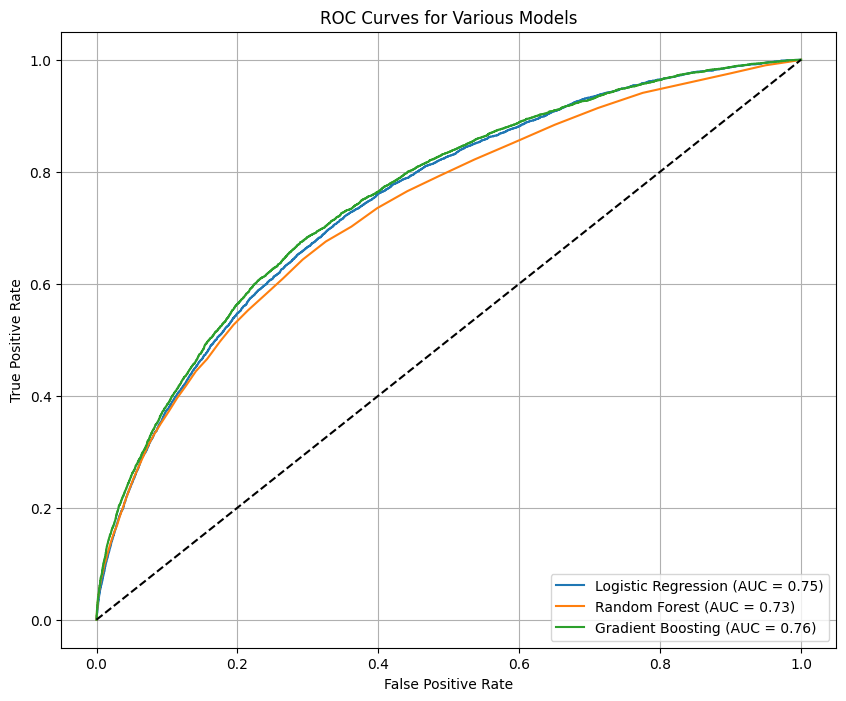

In [ ]:
# Import Necessary Modules
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Dictionary to store ROC data
roc_data = {}

# Assuming you have X_test, y_test, and your trained models
# Re-initialize the model so that it will be fit
models = {
    "Logistic Regression": LogisticRegression(),  # Initialize the model, and fit it later
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    # Fit the model before you start predictions
    model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Store ROC data in the dictionary
    roc_data[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot each ROC curve
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})')

# Plot the 45-degree line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Customize the plot
plt.title('ROC Curves for Various Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()